In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [3]:
def extract_mars_data(date, api_key):
    try:
        with requests.Session() as session:
            response = session.get(f"https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?earth_date={date}&api_key={api_key}")
            response.raise_for_status()
            data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Ошибка при запросе данных: {e}")
        return None       
    

In [4]:
def get_mars_photos_to_DataFrame(data):
    try:
        if not data or 'photos' not in data or not data['photos']:
            print("Нет данных для преобразования в DataFrame")
        return pd.json_normalize(data["photos"])
    except Exception as e:
        print(f"Ошибка преобразования в DataFramae: {e}")
        return None

In [5]:
def count_photos_by_camera_name(df):
    try:
        return df['camera.full_name'].value_counts()
    except Exception as e:
        print(f"Ошибка при подсчете фотографий: {e}")
    

In [6]:
def get_pie_chart(data):
    try:
        if data.empty:
            print("Нет данных для построения диаграммы")
        data.plot.pie(autopct='%1.1f%%', startangle=160)
        plt.title("Распределение фотографий по камерам")
        plt.ylabel("")
        plt.show()
    except Exception as e:
        print(f"Ошибка при построении диаграммы: {e}")
    

In [7]:
def write_mars_data_to_excel(mars_photos_df, photo_counts, filename):
    try:
        with pd.ExcelWriter(filename, engine="xlsxwriter") as writer:
            if mars_photos_df is not None:
                mars_photos_df.to_excel(writer, sheet_name="Mars_photos", index=False)
            if photo_counts is not None:
                photo_counts.to_excel(writer, sheet_name="Photo_counts")
                workbook = writer.book
                worksheet = writer.sheets["Photo_counts"]

                # Создаем круговую диаграмму
                chart = workbook.add_chart({'type': 'pie'})

                # Добавляем данные в диаграмму 
                chart.add_series({
                    'categories': ['Photo_counts', 1, 0, len(photo_counts), 0], 
                    'values':     ['Photo_counts', 1, 1, len(photo_counts), 1],  
                    'data_labels': {'percentage': True, 'num_format': '0.0%'},  
                })

                # Настраиваем заголовок диаграммы
                chart.set_title({'name': 'Распределение фотографий по камерам'})

                # Размещаем диаграмму на листе
                worksheet.insert_chart('D2', chart)
        print(f"Данные успешно сохранены в '{filename}'")
    except Exception as e:
        print(f"Ошибка записи данных в Excel: {e}")

In [8]:
def main(date, api_key):
    mars_data = extract_mars_data(date, api_key)

    if mars_data is None:
        print("Не удалось получить данные от API")
    mars_photos_df = get_mars_photos_to_DataFrame(mars_data)
    photo_counts = count_photos_by_camera_name(mars_photos_df)
    pie_chart = get_pie_chart(photo_counts)
    write_mars_data_to_excel(mars_photos_df, photo_counts, 'files/mars_data.xlsx')


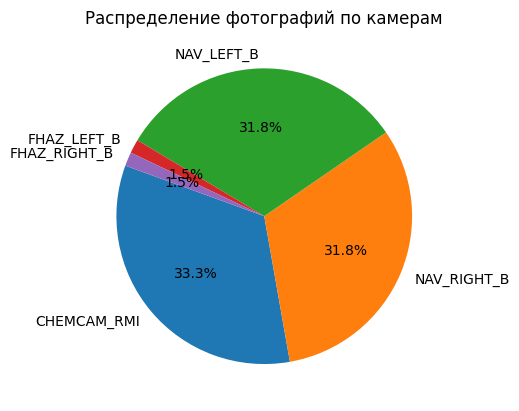

Данные успешно сохранены в 'files/mars_data.xlsx'


In [9]:
if __name__ == "__main__":
    date = '2025-03-25'
    API_KEY = "502SJWBgC67LUsXow8S2uPQtZC29d2iDQ7Og6Hkg"
    main(date, API_KEY)